welcome to my notebook for FIFA 19 dataset

in this notebook i will use FIFA 19 dataset to show different insights about player's values ,wages and their different attributes like age, overall, speed, ability to take freekicks and more, also i've done some EDA to understand the distribution of the features 

i used other datasets also to show the change of overall for some players over years

you can take a look at this notebook in kaggle from [here](https://www.kaggle.com/muhammadayman/some-insights-for-fifa-19)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns

#plt.style.use('ggplot')
#plt.style.use('tableau-colorblind10')


In [2]:
pd.set_option('display.max_columns', None)
data= pd.read_csv("/home/muhammad/Desktop/FIFA project/data.csv")


In [3]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


### let's get rid of sympols beside Value and Wage columns

In [4]:
def value_and_wage_conversion(Value):
    out = Value.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in Value:
        out = float(out.replace('K', ''))*1000
    return float(out)


data['Value'] = data['Value'].apply(lambda x: value_and_wage_conversion(x))
data['Wage'] = data['Wage'].apply(lambda x: value_and_wage_conversion(x))

data['Wage'].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: float64

In [5]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,110500000.0,565000.0,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,77000000.0,405000.0,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,118500000.0,290000.0,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,72000000.0,260000.0,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,102000000.0,355000.0,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,2.410696e+06,9731.312133,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,5.594933e+06,21999.290406,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,2346.000000,5.000000,5.000000,5.0

In [7]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [8]:
data['Club'].fillna('No Club', inplace = True)
data['Position'].fillna('unknown', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)


In [9]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [10]:
new_data=data[["Name","Nationality","Club","Age",'Overall','Position',"Preferred Foot",'Value','Wage','Work Rate','International Reputation', 'Skill Moves', 'Finishing', 'FKAccuracy', 'SprintSpeed']]

new_data.head()


,Name,Nationality,Club,Age,Overall,Position,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Finishing,FKAccuracy,SprintSpeed
0,L. Messi,Argentina,FC Barcelona,31,94,RF,Left,110500000.0,565000.0,Medium/ Medium,5.0,4.0,95.0,94.0,86.0
1,Cristiano Ronaldo,Portugal,Juventus,33,94,ST,Right,77000000.0,405000.0,High/ Low,5.0,5.0,94.0,76.0,91.0
2,Neymar Jr,Brazil,Paris Saint-Germain,26,92,LW,Right,118500000.0,290000.0,High/ Medium,5.0,5.0,87.0,87.0,90.0
3,De Gea,Spain,Manchester United,27,91,GK,Right,72000000.0,260000.0,Medium/ Medium,4.0,1.0,13.0,19.0,58.0
4,K. De Bruyne,Belgium,Manchester City,27,91,RCM,Right,102000000.0,355000.0,High/ High,4.0,4.0,82.0,83.0,76.0


In [11]:
new_data.shape

(18207, 15)

In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Nationality               18207 non-null  object 
 2   Club                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Overall                   18207 non-null  int64  
 5   Position                  18207 non-null  object 
 6   Preferred Foot            18207 non-null  object 
 7   Value                     18207 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Work Rate                 18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Finishing                 18159 non-null  float64
 13  FKAccuracy                18159 non-null  float64
 14  Sprint

In [13]:
new_data.isnull().sum()

Name                         0
Nationality                  0
Club                         0
Age                          0
Overall                      0
Position                     0
Preferred Foot               0
Value                        0
Wage                         0
Work Rate                    0
International Reputation    48
Skill Moves                 48
Finishing                   48
FKAccuracy                  48
SprintSpeed                 48
dtype: int64

In [14]:
print(data["International Reputation"].unique())
print(data["Skill Moves"].unique())
print(data["Finishing"].unique())
print(data["FKAccuracy"].unique())
print(data["SprintSpeed"].unique())

[ 5.  4.  3.  2.  1. nan]
[ 4.  5.  1.  3.  2. nan]
[95. 94. 87. 13. 82. 84. 72. 93. 60. 11. 91. 76. 42. 65. 90. 14. 67. 89.
 33. 88. 59. 83. 77. 79. 80. 55. 70. 86. 10. 92. 38. 15. 51. 19. 73. 56.
 64. 81. 75. 52. 40. 69. 46. 48. 45. 47. 66. 78. 63. 54. 12. 34. 57. 43.
 37. 20. 41. 85. 18. 25.  9. 71. 44. 27. 21. 74. 31. 68. 39. 62. 29. 61.
 32. 50. 16. 53.  8. 23. 58. 30. 49. 17. 36. 28. 35. 26.  6. 22. 24.  7.
  5.  2.  4. nan]
[94. 76. 87. 19. 83. 79. 78. 84. 72. 14. 86. 51. 77. 49. 88. 68. 12. 20.
 11. 73. 31. 63. 60. 74. 53. 67. 10. 62. 64. 13. 45. 28. 82. 15. 66. 43.
 70. 65. 54. 59. 58. 61. 69. 92. 27. 30. 75. 18. 71. 39. 90. 52. 47. 44.
 81. 32. 50. 16.  8. 22. 35. 56. 29. 80. 37. 57. 26. 55. 21. 25. 24. 46.
 42. 93. 48. 34. 33. 85. 17. 40. 38. 41. 36.  9. 23. 91.  7.  4. nan  6.
  3.]
[86. 91. 90. 58. 76. 88. 72. 75. 60. 78. 62. 68. 64. 83. 85. 50. 52. 80.
 96. 65. 67. 69. 73. 95. 82. 55. 43. 79. 53. 93. 59. 74. 63. 77. 92. 66.
 70. 45. 84. 61. 47. 89. 87. 56. 44. 57. 54. 33.

In [15]:
new_data["International Reputation"].fillna(3, inplace = True)
new_data['Skill Moves'].fillna(3, inplace = True)
new_data['Finishing'].fillna(int(new_data['Finishing'].median()), inplace = True)
new_data["FKAccuracy"].fillna(int(new_data["FKAccuracy"].median()), inplace = True)
new_data["SprintSpeed"].fillna(int(new_data["SprintSpeed"].median()), inplace = True)


/home/muhammad/.local/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [16]:
new_data.isnull().sum()

Name                        0
Nationality                 0
Club                        0
Age                         0
Overall                     0
Position                    0
Preferred Foot              0
Value                       0
Wage                        0
Work Rate                   0
International Reputation    0
Skill Moves                 0
Finishing                   0
FKAccuracy                  0
SprintSpeed                 0
dtype: int64

In [17]:
print(new_data["International Reputation"].unique())
print(new_data["Skill Moves"].unique())
print(new_data["Finishing"].unique())
print(new_data["FKAccuracy"].unique())
print(new_data["SprintSpeed"].unique())

[5. 4. 3. 2. 1.]
[4. 5. 1. 3. 2.]
[95. 94. 87. 13. 82. 84. 72. 93. 60. 11. 91. 76. 42. 65. 90. 14. 67. 89.
 33. 88. 59. 83. 77. 79. 80. 55. 70. 86. 10. 92. 38. 15. 51. 19. 73. 56.
 64. 81. 75. 52. 40. 69. 46. 48. 45. 47. 66. 78. 63. 54. 12. 34. 57. 43.
 37. 20. 41. 85. 18. 25.  9. 71. 44. 27. 21. 74. 31. 68. 39. 62. 29. 61.
 32. 50. 16. 53.  8. 23. 58. 30. 49. 17. 36. 28. 35. 26.  6. 22. 24.  7.
  5.  2.  4.]
[94. 76. 87. 19. 83. 79. 78. 84. 72. 14. 86. 51. 77. 49. 88. 68. 12. 20.
 11. 73. 31. 63. 60. 74. 53. 67. 10. 62. 64. 13. 45. 28. 82. 15. 66. 43.
 70. 65. 54. 59. 58. 61. 69. 92. 27. 30. 75. 18. 71. 39. 90. 52. 47. 44.
 81. 32. 50. 16.  8. 22. 35. 56. 29. 80. 37. 57. 26. 55. 21. 25. 24. 46.
 42. 93. 48. 34. 33. 85. 17. 40. 38. 41. 36.  9. 23. 91.  7.  4.  6.  3.]
[86. 91. 90. 58. 76. 88. 72. 75. 60. 78. 62. 68. 64. 83. 85. 50. 52. 80.
 96. 65. 67. 69. 73. 95. 82. 55. 43. 79. 53. 93. 59. 74. 63. 77. 92. 66.
 70. 45. 84. 61. 47. 89. 87. 56. 44. 57. 54. 33. 71. 51. 49. 46. 37. 81.
 4

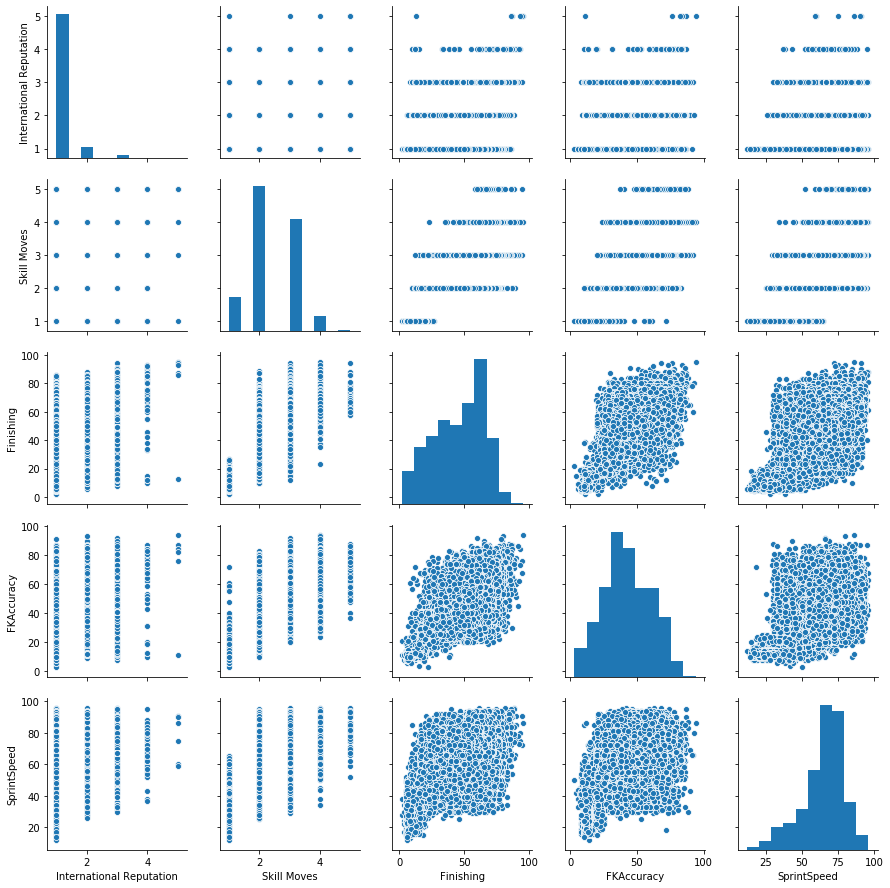

In [18]:

sns.pairplot(new_data[["International Reputation","Skill Moves","Finishing","FKAccuracy","SprintSpeed"]], palette='deep')


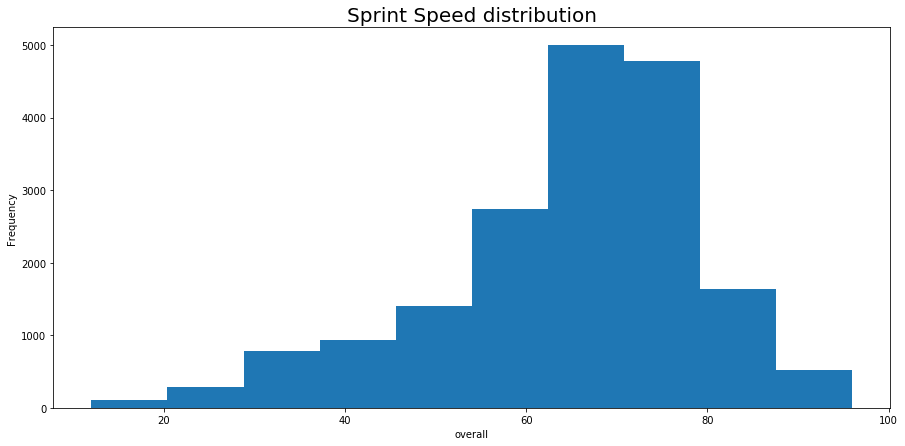

In [19]:
plt.figure(figsize=(15, 7))
#new_data["International Reputation"].plot(kind="hist")
#new_data["Finishing"].plot(kind="hist")
#new_data["Skill Moves"].plot(kind="hist")
#new_data["FKAccuracy"].plot(kind="hist")
new_data["SprintSpeed"].plot(kind="hist")

plt.xlabel("overall")
plt.title("Sprint Speed distribution", fontsize = 20)

plt.show()

In [20]:
new_data[new_data["International Reputation"] == 5]

,Name,Nationality,Club,Age,Overall,Position,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Finishing,FKAccuracy,SprintSpeed
0,L. Messi,Argentina,FC Barcelona,31,94,RF,Left,110500000.0,565000.0,Medium/ Medium,5.0,4.0,95.0,94.0,86.0
1,Cristiano Ronaldo,Portugal,Juventus,33,94,ST,Right,77000000.0,405000.0,High/ Low,5.0,5.0,94.0,76.0,91.0
2,Neymar Jr,Brazil,Paris Saint-Germain,26,92,LW,Right,118500000.0,290000.0,High/ Medium,5.0,5.0,87.0,87.0,90.0
7,L. Suárez,Uruguay,FC Barcelona,31,91,RS,Right,80000000.0,455000.0,High/ Medium,5.0,3.0,93.0,84.0,75.0
22,M. Neuer,Germany,FC Bayern München,32,89,GK,Right,38000000.0,130000.0,Medium/ Medium,5.0,1.0,13.0,11.0,60.0
109,Z. Ibrahimović,Sweden,LA Galaxy,36,85,RS,Right,14000000.0,15000.0,Medium/ Low,5.0,5.0,86.0,82.0,59.0


### let's see some visuals for players attributes

In [21]:
top_speed = new_data.sort_values(by=['SprintSpeed'], ascending=False).head(10)
fk = new_data.sort_values(by=['FKAccuracy'], ascending=False).head(10)
sk = new_data.sort_values(by=['Skill Moves',"Overall"], ascending=False).head(10)
finish = new_data.sort_values(by=['Finishing'], ascending=False).head(10)


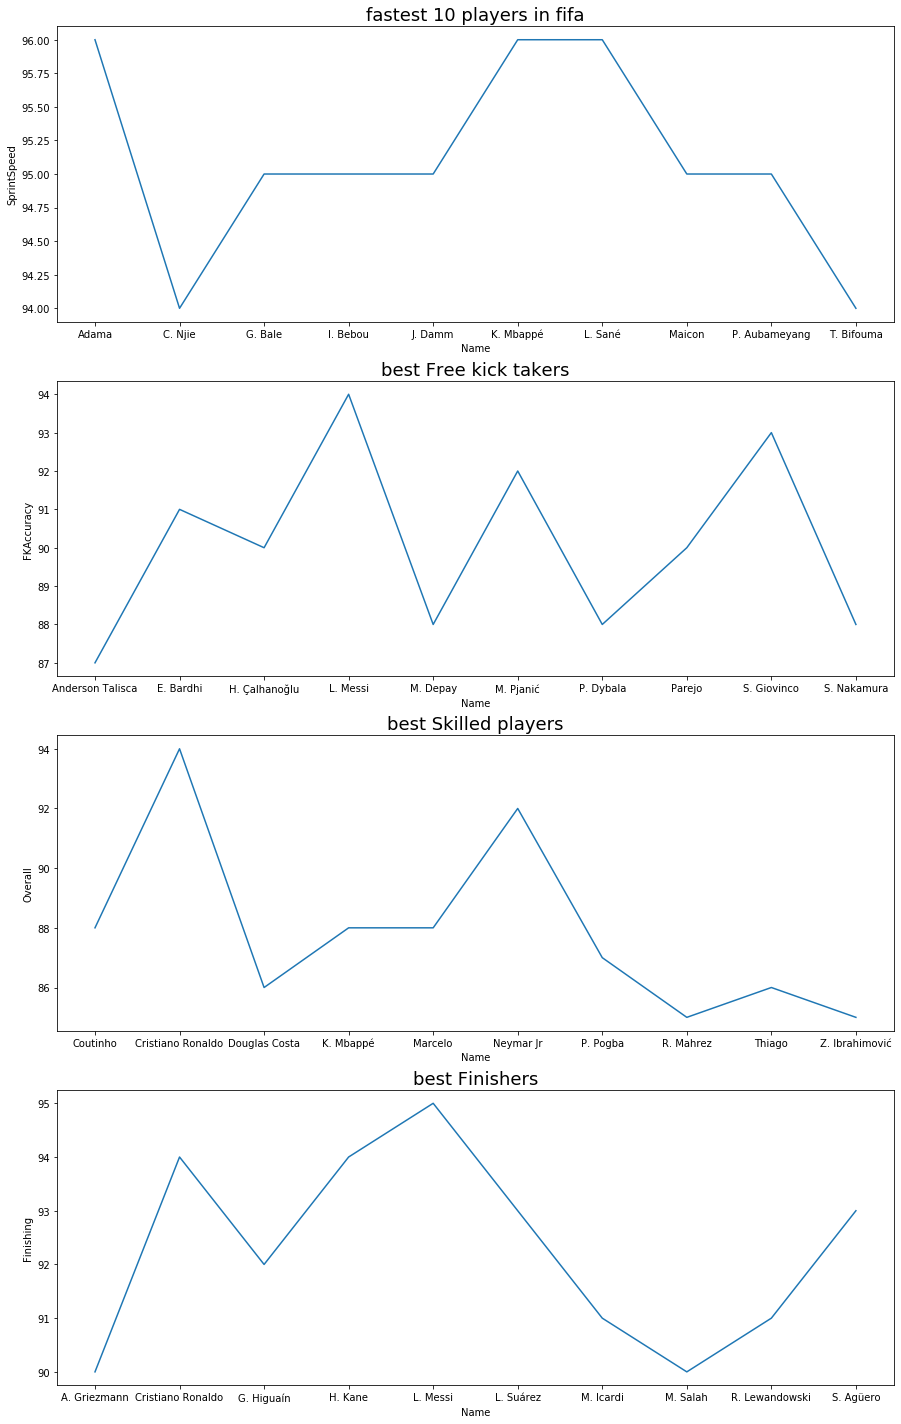

In [22]:
fig, ax1 = plt.subplots(nrows=4, ncols=1, figsize=[15, 25])


sns.lineplot(top_speed["Name"],top_speed["SprintSpeed"],ax = ax1[0]).set_title("fastest 10 players in fifa", fontsize=18)
sns.lineplot(fk["Name"],fk["FKAccuracy"],ax = ax1[1]).set_title("best Free kick takers", fontsize=18)
sns.lineplot(sk["Name"],sk["Overall"],ax = ax1[2]).set_title("best Skilled players", fontsize=18)
sns.lineplot(finish["Name"],finish["Finishing"],ax = ax1[3]).set_title("best Finishers", fontsize=18)

plt.show()

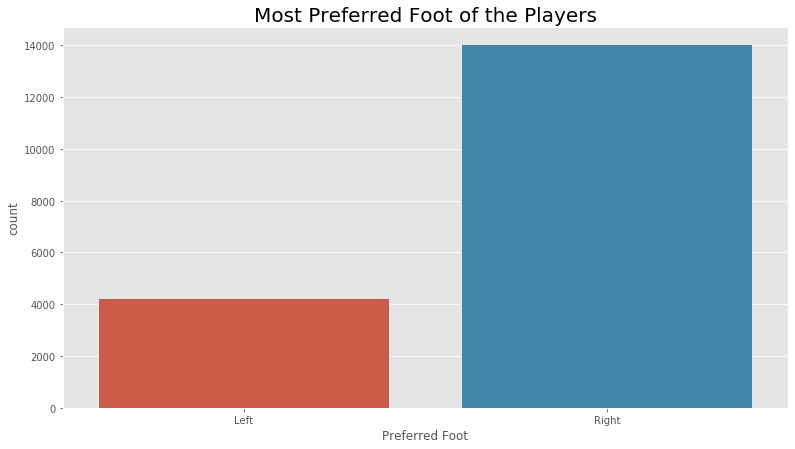

In [23]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13, 7)
sns.countplot(new_data['Preferred Foot'])
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

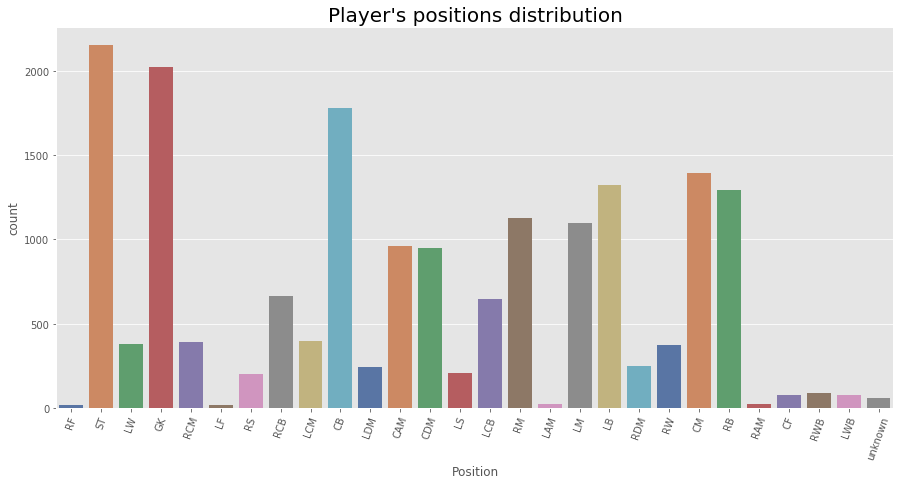

In [24]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(new_data['Position'],palette="deep")
plt.title("Player's positions distribution", fontsize = 20)
plt.tick_params(axis='x', rotation=70)
plt.show()

### a little bit confusing, let's try a trick

In [25]:
new_data['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 'unknown'],
      dtype=object)

In [26]:
conditions = [
    (new_data['Position'] == 'RF') | (new_data['Position'] == 'ST') | (new_data['Position'] == 'LW') | (new_data['Position'] == 'LF') | (new_data['Position'] == 'RS') | (new_data['Position'] == 'LS') | (new_data['Position'] == 'RW') | (new_data['Position'] == 'CF')
    ,(new_data['Position'] == 'RCM') | (new_data['Position'] == 'LCM') | (new_data['Position'] == 'LDM') | (new_data['Position'] == 'CAM') | (new_data['Position'] == 'CDM') | (new_data['Position'] == 'RM') | (new_data['Position'] == 'LAM') | (new_data['Position'] == 'LM') | (new_data['Position'] == 'RDM') & (new_data['Position'] == 'CM') | (new_data['Position'] == 'RAM')
    ,(new_data['Position'] == 'RCB') | (new_data['Position'] == 'CB') | (new_data['Position'] == 'LCB') | (new_data['Position'] == 'LB') | (new_data['Position'] == 'RB') | (new_data['Position'] == 'LWB') | (new_data['Position'] == 'RWB')
    ,(new_data['Position'] == 'GK')]

choices = ['ATK','MID','DEF',"GK"]
new_data['general position'] = np.select(conditions, choices, default='unkown')
new_data['general position']

/home/muhammad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0           ATK
1           ATK
2           ATK
3            GK
4           MID
          ...  
18202    unkown
18203       ATK
18204       ATK
18205       ATK
18206    unkown
Name: general position, Length: 18207, dtype: object

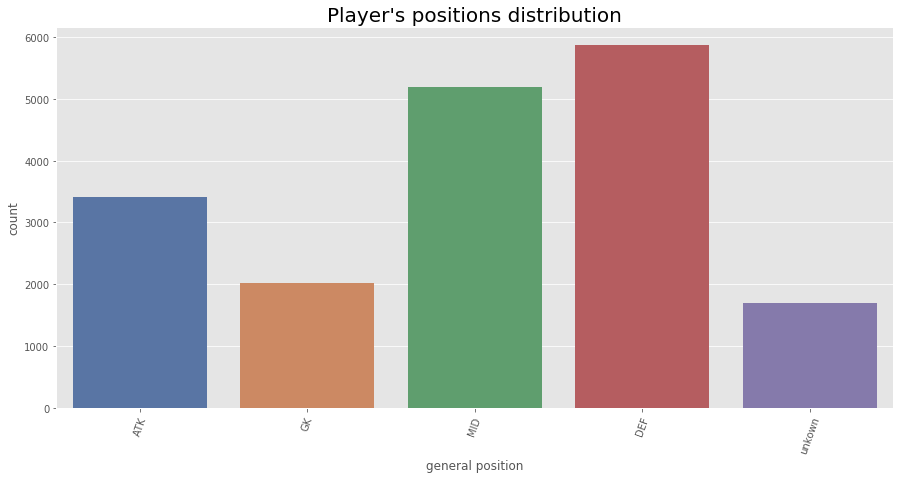

In [27]:
plt.rcParams['figure.figsize'] = (15, 7)

sns.countplot(new_data['general position'],palette="deep")
plt.title("Player's positions distribution", fontsize = 20)
plt.tick_params(axis='x', rotation=70)
plt.show()

### much better, as you can see in the first plot that it may misleading us to think that attack players are more than other players just because the number of ST players

## Now let's analyse the highest players values for every position, as follows:
**attack as  ST**

**midfield as CM**

**defence as CB**

**goalkeeping as GK**



### - We need to merge LCM and RCM to CM to get the total number of CMs , so do with CB, RCB ,LCB
### - each position will be colored with it's color in the game

In [28]:
st_total= new_data[new_data["Position"] == "ST"].head(10)
st_total = st_total.sort_values(by=['Value'], ascending=False).head(10)
st_total

#------------------------------------------------------------------------
cm = new_data[new_data["Position"] == "CM"]
rcm = new_data[new_data["Position"] == "RCM"]
lcm = new_data[new_data["Position"] == "LCM"]

cm_total = pd.concat([cm, rcm,lcm], ignore_index=True)
top_cm = cm_total.sort_values(by=['Value'], ascending=False).head(10)

#------------------------------------------------------------------------
cb = new_data[new_data["Position"] == "CB"]
rcb = new_data[new_data["Position"] == "RCB"]
lcb = new_data[new_data["Position"] == "LCB"]

cb_total = pd.concat([cb, rcb,lcb], ignore_index=True)
top_cb = cb_total.sort_values(by=['Value'], ascending=False).head(10)

#------------------------------------------------------------------------

top_gk= new_data[new_data["Position"] == "GK"].head(10)


In [29]:
def top10_position_value(df , color ,position,ax):
    
    plt.style.use('tableau-colorblind10')
    
    sns.barplot(df["Name"],df["Value"],color=color , ax=ax).set_title("top 10 " + position +" players according to their value", fontsize=18)
            
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
        

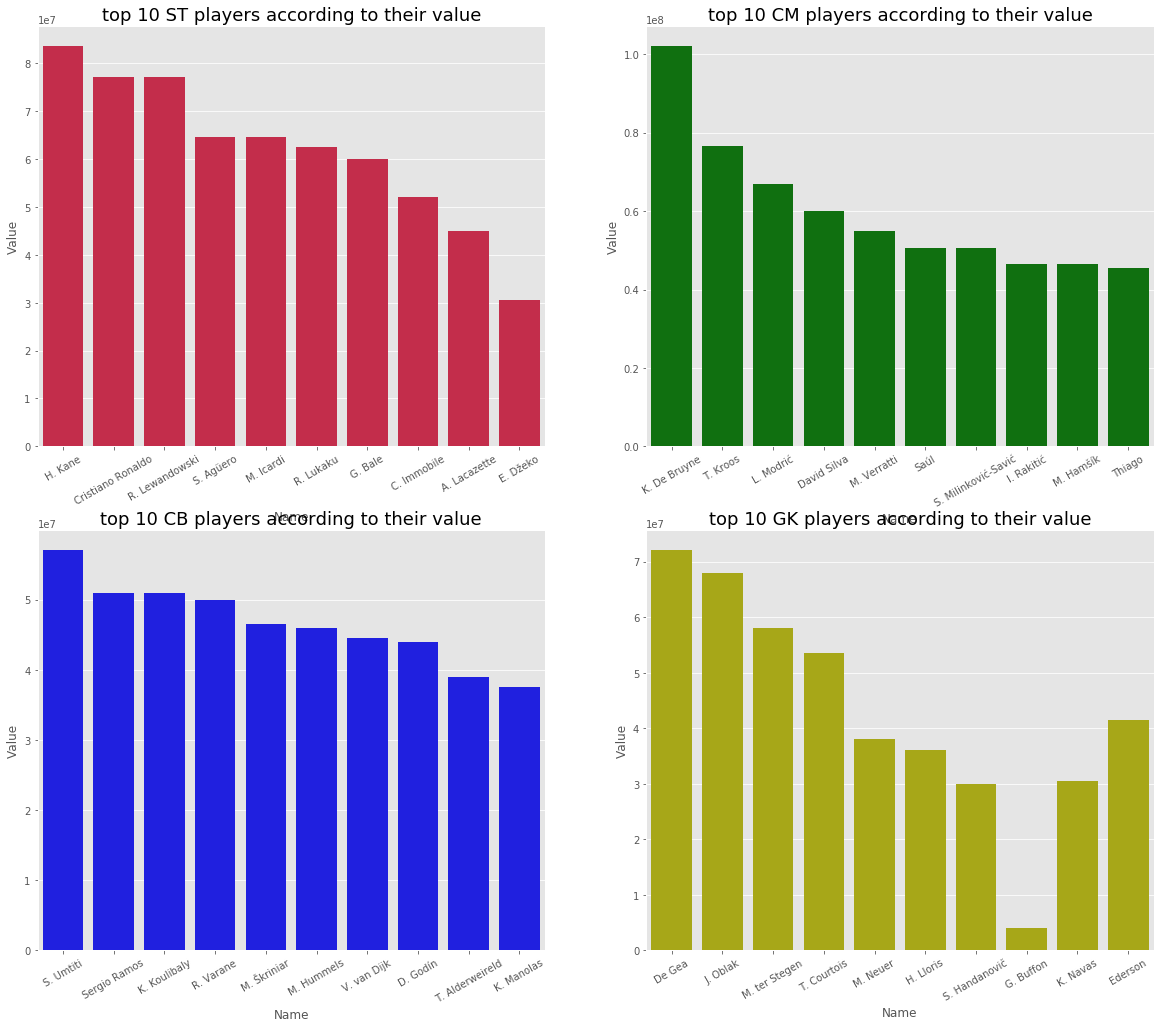

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20, 17])

top10_position_value(st_total , "crimson" ,"ST" , axes[0,0])

top10_position_value(top_cm   , "g"       ,"CM" , axes[0,1])

top10_position_value(top_cb   , "b"       ,"CB" , axes[1,0])

top10_position_value(top_gk   , "y"       ,"GK" , axes[1,1])


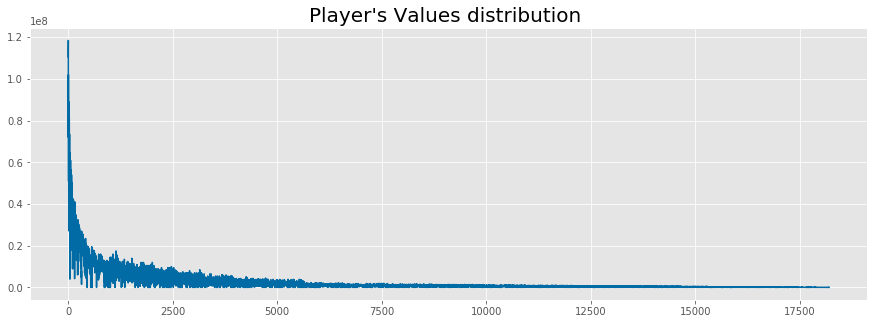

In [31]:
plt.rcParams['figure.figsize'] = (15, 5)

new_data["Value"].plot(kind="line")

plt.title("Player's Values distribution ", fontsize = 20)
plt.show()

In [32]:
top_10_values = new_data.sort_values(by=['Value'], ascending=False).head(10)
top_10_values

,Name,Nationality,Club,Age,Overall,Position,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Finishing,FKAccuracy,SprintSpeed,general position
2,Neymar Jr,Brazil,Paris Saint-Germain,26,92,LW,Right,118500000.0,290000.0,High/ Medium,5.0,5.0,87.0,87.0,90.0,ATK
0,L. Messi,Argentina,FC Barcelona,31,94,RF,Left,110500000.0,565000.0,Medium/ Medium,5.0,4.0,95.0,94.0,86.0,ATK
4,K. De Bruyne,Belgium,Manchester City,27,91,RCM,Right,102000000.0,355000.0,High/ High,4.0,4.0,82.0,83.0,76.0,MID
5,E. Hazard,Belgium,Chelsea,27,91,LF,Right,93000000.0,340000.0,High/ Medium,4.0,4.0,84.0,79.0,88.0,ATK
15,P. Dybala,Argentina,Juventus,24,89,LF,Left,89000000.0,205000.0,High/ Medium,3.0,4.0,84.0,88.0,83.0,ATK
16,H. Kane,England,Tottenham Hotspur,24,89,ST,Right,83500000.0,205000.0,High/ High,3.0,3.0,94.0,68.0,72.0,ATK
25,K. Mbappé,France,Paris Saint-Germain,19,88,RM,Right,81000000.0,100000.0,High/ Medium,3.0,5.0,88.0,63.0,96.0,MID
7,L. Suárez,Uruguay,FC Barcelona,31,91,RS,Right,80000000.0,455000.0,High/ Medium,5.0,3.0,93.0,84.0,75.0,ATK
17,A. Griezmann,France,Atlético Madrid,27,89,CAM,Left,78000000.0,145000.0,High/ High,4.0,4.0,90.0,78.0,85.0,MID
10,R. Lewandowski,Poland,FC Bayern München,29,90,ST,Right,77000000.0,205000.0,High/ Medium,4.0,4.0,91.0,86.0,78.0,ATK


Text(0.5, 1.0, 'Values of Top 10 players')

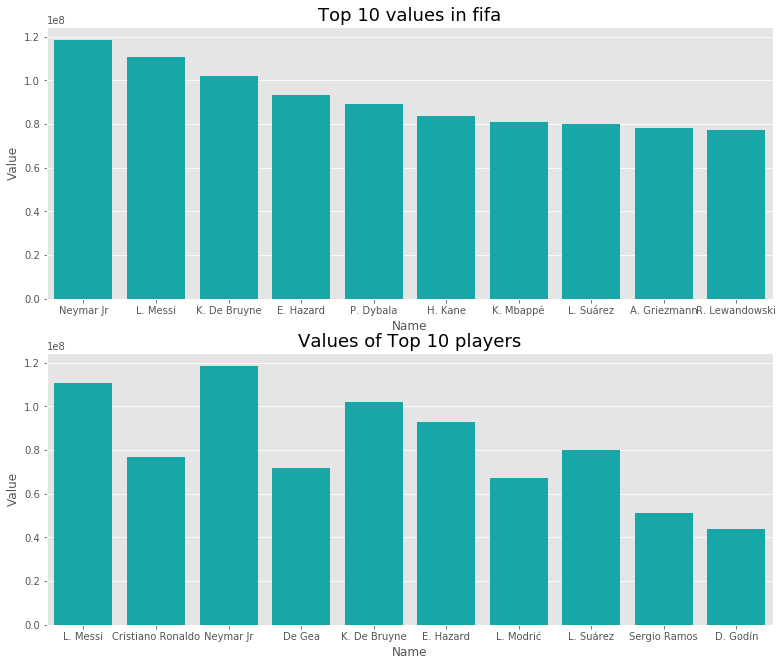

In [33]:
fig, ax2 = plt.subplots(nrows=2, ncols=1, figsize=[13, 11])

sns.barplot(top_10_values['Name'],top_10_values['Value'],color="c", ax =ax2[0]).set_title("Top 10 values in fifa", fontsize=18)

top_10_players_overall_value = new_data.sort_values(by=['Overall'], ascending=False).head(10)
top_10_players_overall_value
sns.barplot(top_10_players_overall_value["Name"].head(10),top_10_players_overall_value["Value"].head(10),color="c", ax =ax2[1]).set_title("Values of Top 10 players", fontsize=18)



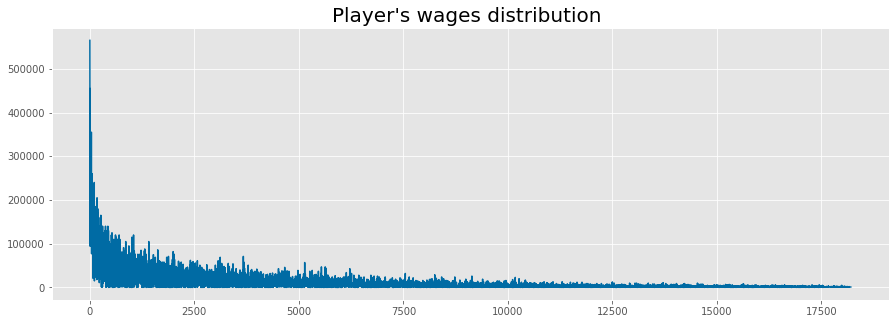

In [34]:
plt.rcParams['figure.figsize'] = (15, 5)

new_data["Wage"].plot(kind="line")

plt.title("Player's wages distribution ", fontsize = 20)
plt.show()

In [35]:
top_10_wages = new_data.sort_values(by=['Wage'], ascending=False).head(10)
top_10_wages

,Name,Nationality,Club,Age,Overall,Position,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Finishing,FKAccuracy,SprintSpeed,general position
0,L. Messi,Argentina,FC Barcelona,31,94,RF,Left,110500000.0,565000.0,Medium/ Medium,5.0,4.0,95.0,94.0,86.0,ATK
7,L. Suárez,Uruguay,FC Barcelona,31,91,RS,Right,80000000.0,455000.0,High/ Medium,5.0,3.0,93.0,84.0,75.0,ATK
6,L. Modrić,Croatia,Real Madrid,32,91,RCM,Right,67000000.0,420000.0,High/ High,4.0,4.0,72.0,78.0,72.0,MID
1,Cristiano Ronaldo,Portugal,Juventus,33,94,ST,Right,77000000.0,405000.0,High/ Low,5.0,5.0,94.0,76.0,91.0,ATK
8,Sergio Ramos,Spain,Real Madrid,32,91,RCB,Right,51000000.0,380000.0,High/ Medium,4.0,3.0,60.0,72.0,75.0,DEF
11,T. Kroos,Germany,Real Madrid,28,90,LCM,Right,76500000.0,355000.0,Medium/ Medium,4.0,3.0,76.0,84.0,62.0,MID
36,G. Bale,Wales,Real Madrid,28,88,ST,Left,60000000.0,355000.0,High/ Medium,4.0,4.0,86.0,87.0,95.0,ATK
4,K. De Bruyne,Belgium,Manchester City,27,91,RCM,Right,102000000.0,355000.0,High/ High,4.0,4.0,82.0,83.0,76.0,MID
5,E. Hazard,Belgium,Chelsea,27,91,LF,Right,93000000.0,340000.0,High/ Medium,4.0,4.0,84.0,79.0,88.0,ATK
32,Coutinho,Brazil,FC Barcelona,26,88,LW,Right,69500000.0,340000.0,High/ High,3.0,5.0,79.0,86.0,75.0,ATK


Text(0.5, 1.0, 'Wages of Top 10 players')

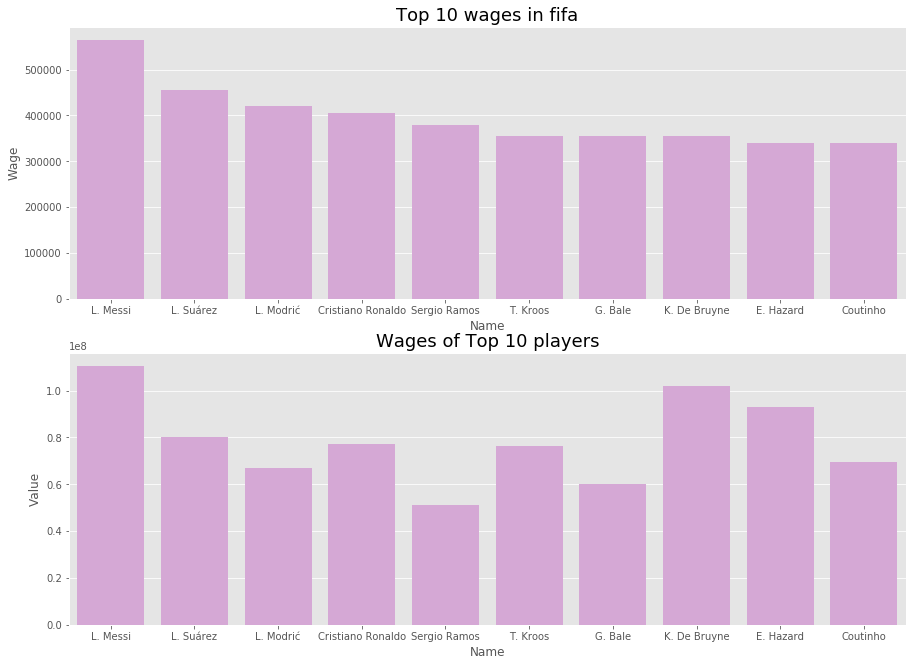

In [36]:
fig, ax3 = plt.subplots(nrows=2, ncols=1, figsize=[15, 11])

sns.barplot(top_10_wages['Name'],top_10_wages['Wage'],color="plum", ax =ax3[0]).set_title("Top 10 wages in fifa", fontsize=18)

top_10_players_overall_wage = new_data.sort_values(by=['Wage'], ascending=False).head(10)
top_10_players_overall_wage
sns.barplot(top_10_players_overall_wage["Name"].head(10),top_10_players_overall_wage["Value"].head(10),color="plum", ax =ax3[1]).set_title("Wages of Top 10 players", fontsize=18)

In [37]:
new_data["Age"]
new_data["Overall"]
new_data["Work Rate"]

0        Medium/ Medium
1             High/ Low
2          High/ Medium
3        Medium/ Medium
4            High/ High
              ...      
18202    Medium/ Medium
18203    Medium/ Medium
18204    Medium/ Medium
18205    Medium/ Medium
18206    Medium/ Medium
Name: Work Rate, Length: 18207, dtype: object

In [38]:
new_data["Age"].astype(int)

0        31
1        33
2        26
3        27
4        27
         ..
18202    19
18203    19
18204    16
18205    17
18206    16
Name: Age, Length: 18207, dtype: int64

In [39]:
new_data["Age"].dtype

dtype('int64')

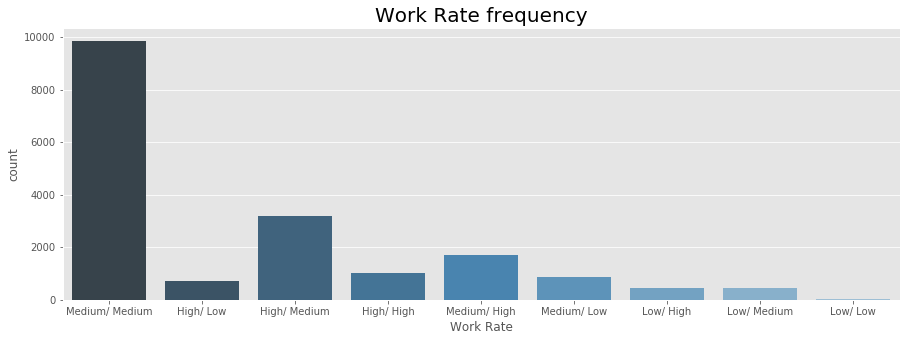

In [40]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(new_data["Work Rate"],palette="Blues_d")
#new_data["Work Rate"].plot(kind="bar")

plt.title("Work Rate frequency", fontsize = 20)
plt.show()

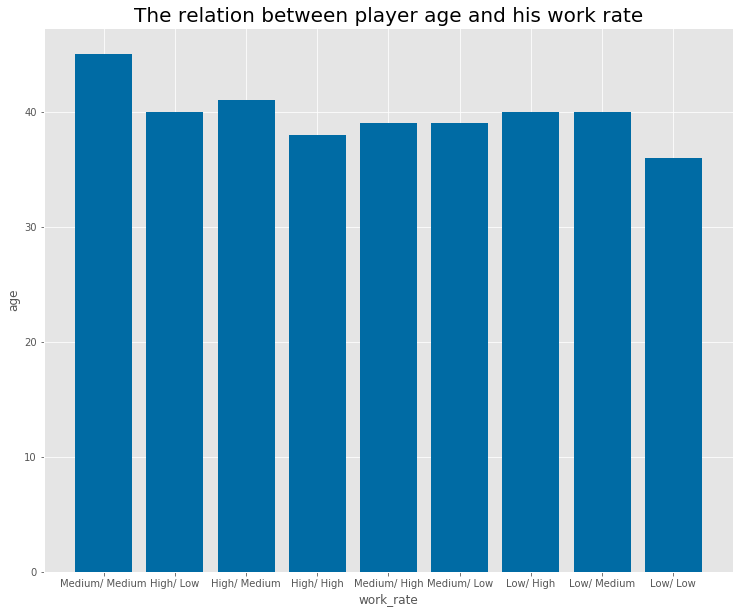

In [41]:
plt.figure(figsize=(42, 10))

plt.subplot(131)
plt.bar(new_data["Work Rate"],new_data["Age"])
plt.ylabel("age")
plt.xlabel("work_rate")

plt.title("The relation between player age and his work rate", fontsize = 20)
plt.show()

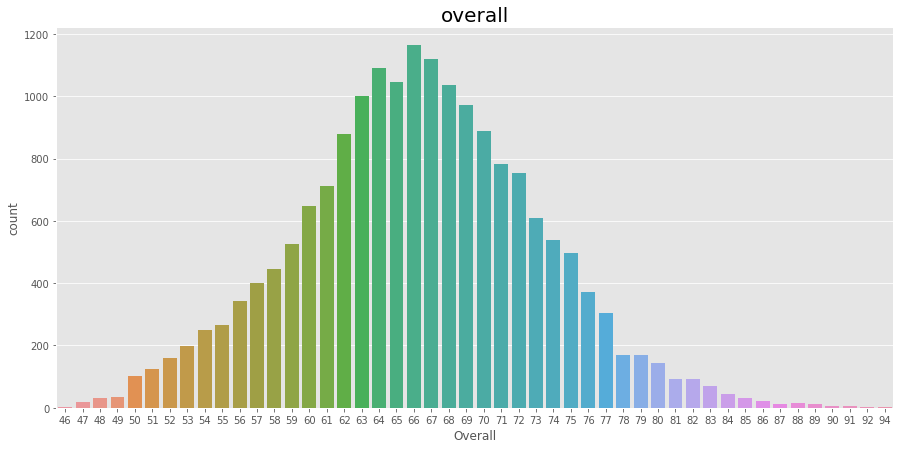

In [42]:
#new_data["Overall"].plot(kind="hist")
plt.figure(figsize=(15, 7))

sns.countplot(new_data['Overall'])
#plt.tick_params(axis='x', rotation=70)

plt.title("overall", fontsize = 20)

plt.show()

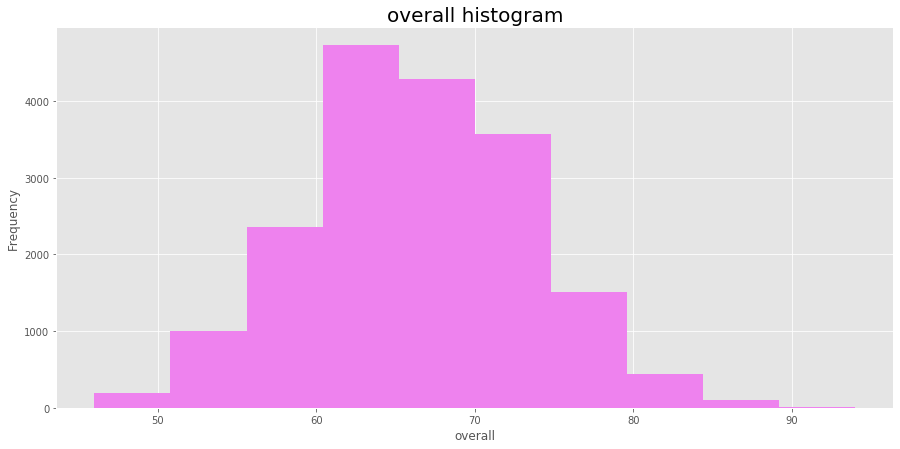

In [43]:
plt.figure(figsize=(15, 7))
new_data["Overall"].plot(kind="hist",color="violet")

#plt.tick_params(axis='x', rotation=70)

plt.title("overall")
plt.xlabel("overall")
plt.title("overall histogram", fontsize = 20)

plt.show()

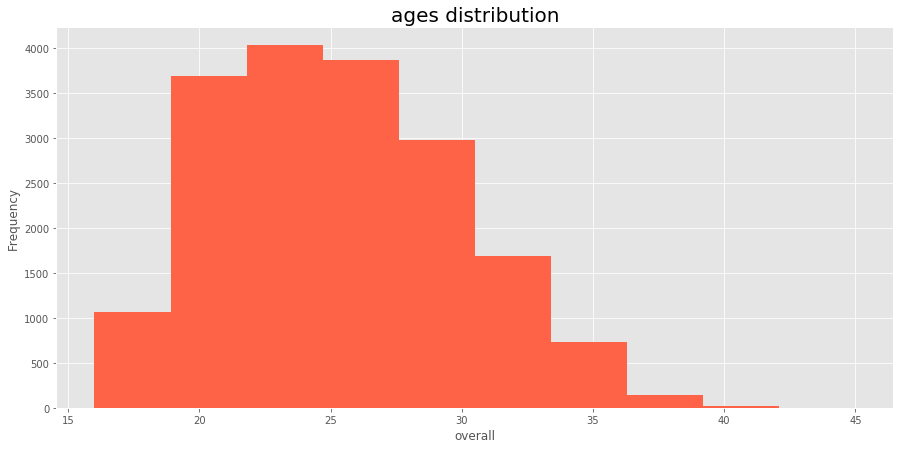

In [44]:
plt.figure(figsize=(15, 7))
#sns.set(style = "dark", palette = "deep", color_codes = True)

new_data["Age"].plot(kind="hist",color='tomato')

plt.title("overall")
plt.xlabel("overall")
plt.title("ages distribution", fontsize = 20)

plt.show()

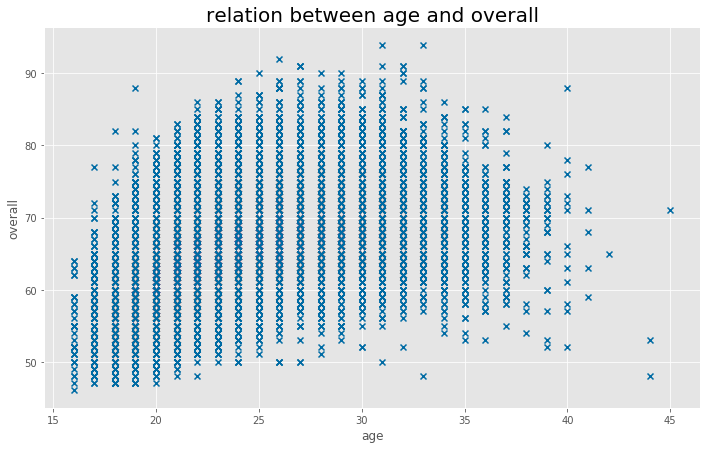

In [45]:
plt.figure(figsize=(40, 7))

plt.subplot(131)
plt.scatter(new_data["Age"], new_data["Overall"],marker="x")

plt.ylabel("overall")
plt.xlabel("age")

plt.title('relation between age and overall',fontsize=20)
plt.show()

### there is no data for age 43

In [46]:
new_data[new_data["Age"] == 43]

,Name,Nationality,Club,Age,Overall,Position,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Finishing,FKAccuracy,SprintSpeed,general position


In [47]:
cb = cb_total[cb_total["Work Rate"] == "High/ High"]
cb_work_rate = cb.sort_values(by=['Overall'], ascending=False).head(10)
cb_work_rate

,Name,Nationality,Club,Age,Overall,Position,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Finishing,FKAccuracy,SprintSpeed,general position
2443,J. Vertonghen,Belgium,Tottenham Hotspur,31,87,LCB,Left,34000000.0,155000.0,High/ High,3.0,3.0,56.0,73.0,65.0,DEF
2442,K. Koulibaly,Senegal,Napoli,27,87,LCB,Right,51000000.0,115000.0,High/ High,3.0,2.0,19.0,28.0,75.0,DEF
3,N. Otamendi,Argentina,Manchester City,30,85,CB,Right,28500000.0,170000.0,High/ High,3.0,2.0,54.0,39.0,61.0,DEF
2449,P. Kimpembe,France,Paris Saint-Germain,22,83,LCB,Left,30500000.0,82000.0,High/ High,2.0,3.0,31.0,32.0,78.0,DEF
1797,A. Rami,France,Olympique de Marseille,32,82,RCB,Right,12500000.0,57000.0,High/ High,3.0,2.0,45.0,55.0,67.0,DEF
2454,H. Maguire,England,Leicester City,25,82,LCB,Right,23500000.0,77000.0,High/ High,1.0,2.0,43.0,46.0,53.0,DEF
2482,L. Dunk,England,Brighton & Hove Albion,26,78,LCB,Right,11000000.0,46000.0,High/ High,1.0,2.0,37.0,39.0,50.0,DEF
48,L. Dendoncker,Belgium,Wolverhampton Wanderers,23,78,CB,Right,12000000.0,18000.0,High/ High,2.0,2.0,66.0,71.0,68.0,DEF
72,G. Dzhikiya,Russia,Spartak Moscow,24,77,CB,Left,10500000.0,1000.0,High/ High,1.0,2.0,43.0,68.0,75.0,DEF
2510,E. Balanta,Colombia,FC Basel 1893,25,76,LCB,Left,9000000.0,23000.0,High/ High,1.0,2.0,36.0,42.0,75.0,DEF


Text(0.5, 1.0, 'STs that have high attack and defence rate above 80 overall')

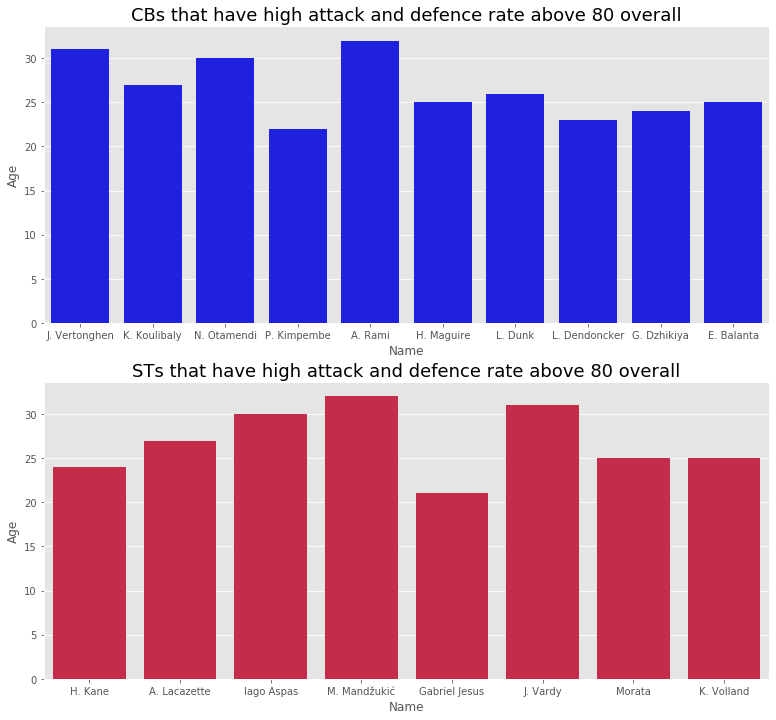

In [48]:
fig, ax4 = plt.subplots(nrows=2, ncols=1, figsize=[13, 12])

sns.barplot(cb_work_rate["Name"], cb_work_rate["Age"],color="blue", ax =ax4[0]).set_title("CBs that have high attack and defence rate above 80 overall", fontsize=18)



st_work_rate_total= new_data[new_data["Position"] == "ST"]
st = st_work_rate_total[st_work_rate_total["Work Rate"] == "High/ High"]
st_work_rate = st[st["Overall"] >= 80]
st_work_rate
sns.barplot(st_work_rate["Name"], st_work_rate["Age"],color="crimson", ax =ax4[1]).set_title("STs that have high attack and defence rate above 80 overall", fontsize=18)


In [49]:
new_data['Club'].unique()

array(['FC Barcelona', 'Juventus', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid',
       'Atlético Madrid', 'FC Bayern München', 'Tottenham Hotspur',
       'Liverpool', 'Napoli', 'Arsenal', 'Milan', 'Inter', 'Lazio',
       'Borussia Dortmund', 'Vissel Kobe', 'Olympique Lyonnais', 'Roma',
       'Valencia CF', 'Guangzhou Evergrande Taobao FC', 'FC Porto',
       'FC Schalke 04', 'Beşiktaş JK', 'LA Galaxy', 'Sporting CP',
       'Real Betis', 'Olympique de Marseille', 'RC Celta',
       'Bayer 04 Leverkusen', 'Real Sociedad', 'Villarreal CF',
       'Sevilla FC', 'SL Benfica', 'AS Saint-Étienne', 'AS Monaco',
       'Leicester City', 'Atalanta', 'Grêmio', 'Atlético Mineiro',
       'RB Leipzig', 'Ajax', 'Dalian YiFang FC', 'Everton',
       'West Ham United', '1. FC Köln', 'TSG 1899 Hoffenheim',
       'Shanghai SIPG FC', 'OGC Nice', 'Al Nassr',
       'Wolverhampton Wanderers', 'Borussia Mönchengladbach',
       'Hertha BSC', 'SV Werder

### Real madrid players info

In [50]:
def Club(x):
    return new_data[new_data['Club'] == x ][['Name','Age','Club',"Value","Position"]].sort_values(by=['Value'],ascending=False)

Real_Madrid = Club('Real Madrid')
Real_Madrid

,Name,Age,Club,Value,Position
11,T. Kroos,28,Real Madrid,76500000.0,LCM
30,Isco,26,Real Madrid,73500000.0,LW
6,L. Modrić,32,Real Madrid,67000000.0,RCM
36,G. Bale,28,Real Madrid,60000000.0,ST
27,Casemiro,26,Real Madrid,59500000.0,CDM
79,Marco Asensio,22,Real Madrid,54000000.0,RW
19,T. Courtois,26,Real Madrid,53500000.0,GK
8,Sergio Ramos,32,Real Madrid,51000000.0,RCB
62,R. Varane,25,Real Madrid,50000000.0,RCB
35,Marcelo,30,Real Madrid,43000000.0,LB


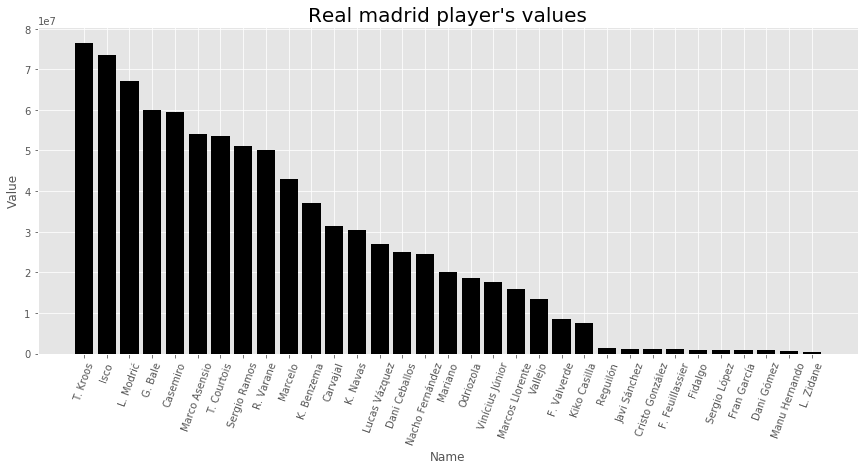

In [51]:

#barca = new_data.loc[new_data['Club']=='FC Barcelona']

plt.figure(figsize=(50, 6))

plt.subplot(131)
plt.bar(Real_Madrid["Name"],Real_Madrid["Value"],color="k")
plt.tick_params(axis='x', rotation=70)

plt.ylabel("Value")
plt.xlabel("Name")

plt.title("Real madrid player's values", fontsize = 20)
plt.show()

In [52]:
new_data["Nationality"].head()

0    Argentina
1     Portugal
2       Brazil
3        Spain
4      Belgium
Name: Nationality, dtype: object

In [53]:
co_ordinates = pd.read_csv("/home/muhammad/Desktop/FIFA project/world_coordinates.csv")
co_ordinates[co_ordinates["Country"] == "Belgium"]

,Code,Country,latitude,longitude
19,BE,Belgium,50.503887,4.469936


In [54]:
latitude = [-38.416097,39.399872,-14.235004,40.463667,50.503887]
longitude = [-63.616672,-8.224454,-51.92528,-3.74922,4.469936]
overall = new_data["Overall"].head()


In [55]:
new_data["Nationality"]

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

### top5 players in the world with their overall and nationality

In [56]:
import folium
incidents = folium.Map(location=[10, -20], zoom_start=2.4,tiles='CartoDB dark_matter')

# loop through the 100 crimes and add each to the incidents feature group
for lat, log, overall,Nationality,name in zip( latitude,longitude, overall,new_data["Nationality"],new_data["Name"]):
    
    folium.CircleMarker(
            [lat, log],
            radius=15,
            popup = ('<strong>name</strong>: ' + str(name) + '<br>'
                     '<strong>Nationality</strong>: ' + str(Nationality).capitalize() + '<br>'
            '<strong>overall</strong>: ' + str(overall) + '<br>'), # define how big you want the circle markers to be
            color='green',
            fill_color='green',
            fill_opacity=0.7
        ).add_to(incidents)
    

# add incidents to map
incidents

/home/muhammad/anaconda3/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.8) or chardet (2.0.3) doesn't match a supported version!
  RequestsDependencyWarning)


In [57]:

natio_count = new_data["Nationality"].value_counts().head()
natio_count

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

In [58]:
dummy_data = {
        'top5': ["England","Germany","Spain","Argentina","France"],
        'long': [1.1743,10.451526,-3.74922,-63.616672,2.213749],
        'late': [52.3555,51.165691,40.463667,-38.416097,46.227638]
}
data_new= pd.DataFrame(dummy_data, columns = ["top5",'long','late'])

data_new

,top5,long,late
0,England,1.174300,52.355500
1,Germany,10.451526,51.165691
2,Spain,-3.749220,40.463667
3,Argentina,-63.616672,-38.416097
4,France,2.213749,46.227638


In [59]:
co_ordinates[co_ordinates["Country"] == "Spain"]

,Code,Country,latitude,longitude
64,ES,Spain,40.463667,-3.74922


### Top 5 countries with the most number of players in it

In [60]:
import folium
incidents_2 = folium.Map(location=[10, -20], zoom_start=2.4,tiles='CartoDB dark_matter')

# loop through the 100 crimes and add each to the incidents feature group
for lat, log,country,count in zip( data_new["late"],data_new["long"],data_new["top5"],natio_count):
    
    folium.CircleMarker(
            [lat, log],
            radius=15,
            popup = ('<strong>natio_count</strong>: ' + str(count) + '<br>'
                     '<strong>country</strong>: ' + str(country).capitalize() + '<br>'), # define how big you want the circle markers to be
            color='yellow',
            fill_color='yellow',
            fill_opacity=0.7
        ).add_to(incidents_2)
    

# add incidents to map
incidents_2

### now let's go and see overall changes for cristiano ronaldo and mbappe

In [61]:
fifa17 = pd.read_csv("/home/muhammad/Desktop/FIFA project/players_17.csv")
fifa18 = pd.read_csv("/home/muhammad/Desktop/FIFA project/CompleteDataset.csv")
fifa19 = pd.read_csv("/home/muhammad/Desktop/FIFA project/data.csv")
fifa20 = pd.read_csv("/home/muhammad/Desktop/FIFA project/players_20.csv")

/home/muhammad/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (23,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
fifa17.head(1)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31,1985-02-05,185,80,Portugal,Real Madrid,94,94,87000000,340000,"LW, LM, ST",Right,5,4,5,High/Low,C. Ronaldo,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LS,7.0,92.0,92.0,81.0,91.0,33.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",84+2,93-2,87+1,82+1,88+1,93,81-7,77,72,92+1,91,92-1,90,96+4,63+1,94,95+1,92+2,80+1,92-1,63+1,29,94+1,85+4,85,86,22,31,23,7,11,15,14,11,92+3,92+3,92+3,91+3,92+3,92+3,92+3,91+3,90+3,90+3,90+3,90+3,82+3,82+3,82+3,90+3,66+3,61+3,61+3,61+3,66+3,62+3,53+3,53+3,53+3,62+3


In [63]:
fifa_17 = fifa17["short_name"][0]
fifa_18 = fifa18["Name"][0]
fifa_19 = fifa19["Name"][1]
fifa_20 = fifa20["short_name"][1]

overall_17 = fifa17["overall"][0]
overall_18 = fifa18["Overall"][0]
overall_19 = fifa19["Overall"][1]
overall_20 = fifa20["overall"][1]

age_17 = fifa17["age"][0]
age_18 = fifa18["Age"][0]
age_19 = fifa19["Age"][1]
age_20 = fifa20["age"][1]

In [64]:
dummy_data = {
        'name': [fifa_17,fifa_18,fifa_19,fifa_20],
        'overall': [overall_17,overall_18,overall_19,overall_20],
        'age': [age_17,age_18,age_19,age_20]
}

In [65]:
CR7 = pd.DataFrame(dummy_data, columns = ['name','overall',"age"])

CR7

,name,overall,age
0,Cristiano Ronaldo,94,31
1,Cristiano Ronaldo,94,32
2,Cristiano Ronaldo,94,33
3,Cristiano Ronaldo,93,34


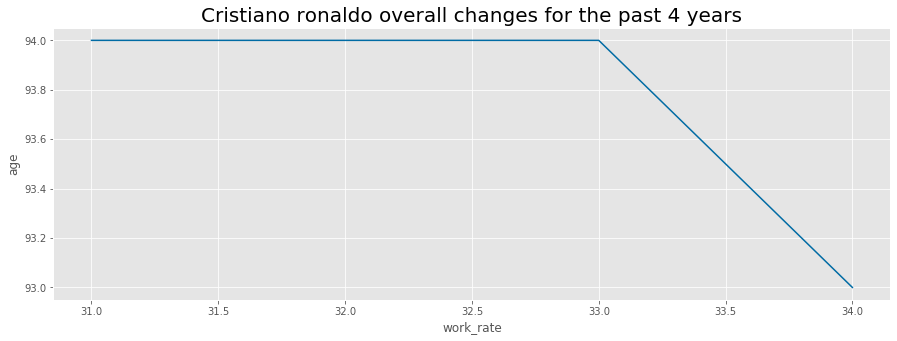

In [66]:
plt.plot(CR7["age"],CR7["overall"])

plt.ylabel("age")
plt.xlabel("work_rate")

plt.title("Cristiano ronaldo overall changes for the past 4 years", fontsize = 20)
plt.show()

In [67]:
fifa17 = fifa17[fifa17["club"] == 'AS Monaco']
fifa17[fifa17["short_name"] == "K. Mbappe Lottin"]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3899,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappe Lottin,Kylian Mbappe Lottin,17,1998-12-20,178,68,France,AS Monaco,71,87,3100000,10000,LW,Right,1,3,3,High/Medium,Normal,No,NaN,NaN,SUB,29.0,NaN,2015-12-02,2019.0,NaN,NaN,81.0,64.0,65.0,74.0,39.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,Technical Dribbler (CPU AI Only),65+4,67+2,43+2,70+12,57+2,77+4,60+8,55+5,58+7,74+6,82,81,68+2,59+11,72,64+4,58+8,69+8,63+4,57,54+20,39+11,66+7,67+14,64,67,38+12,40+8,37+8,13,5,7,11,6,66+0,66+0,66+0,71+0,70+0,70+0,70+0,71+0,70+0,70+0,70+0,71+0,65+0,65+0,65+0,71+0,59+0,55+0,55+0,55+0,59+0,55+0,49+0,49+0,49+0,55+0


In [68]:
fifa17[fifa17["short_name"] == "K. Mbappe Lottin"]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
3899,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappe Lottin,Kylian Mbappe Lottin,17,1998-12-20,178,68,France,AS Monaco,71,87,3100000,10000,LW,Right,1,3,3,High/Medium,Normal,No,NaN,NaN,SUB,29.0,NaN,2015-12-02,2019.0,NaN,NaN,81.0,64.0,65.0,74.0,39.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,Technical Dribbler (CPU AI Only),65+4,67+2,43+2,70+12,57+2,77+4,60+8,55+5,58+7,74+6,82,81,68+2,59+11,72,64+4,58+8,69+8,63+4,57,54+20,39+11,66+7,67+14,64,67,38+12,40+8,37+8,13,5,7,11,6,66+0,66+0,66+0,71+0,70+0,70+0,70+0,71+0,70+0,70+0,70+0,71+0,65+0,65+0,65+0,71+0,59+0,55+0,55+0,55+0,59+0,55+0,49+0,49+0,49+0,55+0


In [69]:
fifa20[fifa20["short_name"] == "K. Mbappé"]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
10,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé,20,1998-12-20,178,73,France,Paris Saint-Germain,89,95,93500000,155000,"ST, RW",Right,3,4,5,High/Low,Normal,Yes,191700000.0,"#Speedster, #Dribbler, #Acrobat",RW,7.0,NaN,2018-07-01,2022.0,RM,10.0,96.0,84.0,78.0,90.0,39.0,75.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Early Crosser, Spe...",78,89,77,82,79,91,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,89,80,70,84,34,34,32,13,5,7,11,6,86+3,86+3,86+3,87+3,87+3,87+3,87+3,87+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,66+3,62+3,62+3,62+3,66+3,63+3,54+3,54+3,54+3,63+3


In [70]:
mbappe_fifa_17 = fifa17["short_name"][3899]
mbappe_fifa_18 = fifa18["Name"][127]
mbappe_fifa_19 = fifa19["Name"][25]
mbappe_fifa_20 = fifa20["short_name"][10]

mbappe_overall_17 = fifa17["overall"][3899]
mbappe_overall_18 = fifa18["Overall"][127]
mbappe_overall_19 = fifa19["Overall"][25]
mbappe_overall_20 = fifa20["overall"][10]

mbappe_age_17 = fifa17["age"][3899]
mbappe_age_18 = fifa18["Age"][127]
mbappe_age_19 = fifa19["Age"][25]
mbappe_age_20 = fifa20["age"][10]

In [71]:
dummy_data2 = {
        'name': [mbappe_fifa_17,mbappe_fifa_18,mbappe_fifa_19,mbappe_fifa_20],
        'overall': [mbappe_overall_17,mbappe_overall_18,mbappe_overall_19,mbappe_overall_20],
        'age': [mbappe_age_17,mbappe_age_18,mbappe_age_19,mbappe_age_20]
}

In [72]:
mbappe = pd.DataFrame(dummy_data2, columns = ['name','overall',"age"])

mbappe

,name,overall,age
0,K. Mbappe Lottin,71,17
1,K. Mbappé,83,18
2,K. Mbappé,88,19
3,K. Mbappé,89,20


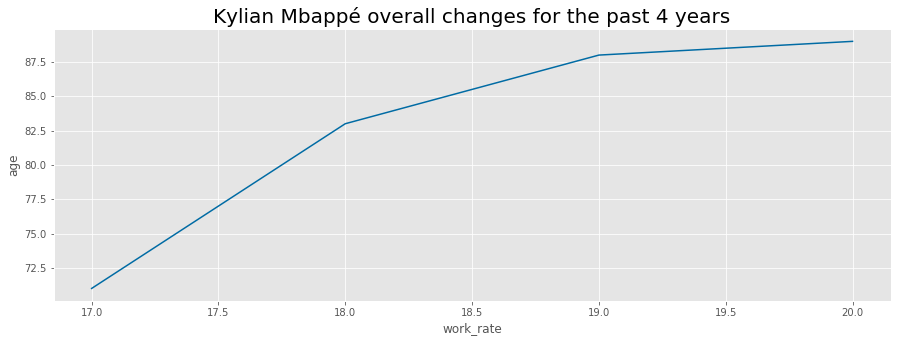

In [73]:
sns.lineplot(mbappe['age'], mbappe["overall"], palette = 'Wistia')

plt.ylabel("age")
plt.xlabel("work_rate")

plt.title("Kylian Mbappé overall changes for the past 4 years", fontsize = 20)
plt.show()

### detecting outliers

In [74]:
box_plot_data = data[["Age",'Overall',"Wage","Value",'Skill Moves', 'Finishing', 'FKAccuracy', 'SprintSpeed']]


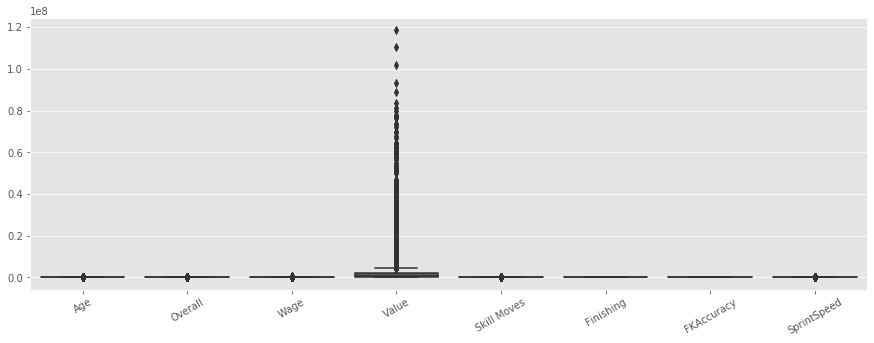

In [75]:
ax = sns.boxplot(data=box_plot_data)
plt.tick_params(axis='x', rotation=30)

### so, this plot won't be useful with value and wage columns because the varaity of the data in them, i will plot them separatly

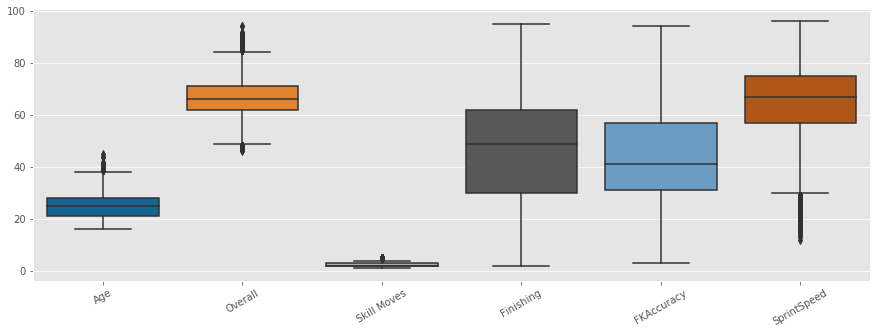

In [76]:
box_plot_data = data[["Age",'Overall','Skill Moves', 'Finishing', 'FKAccuracy', 'SprintSpeed']]

ax = sns.boxplot(data=box_plot_data)
plt.tick_params(axis='x', rotation=30)

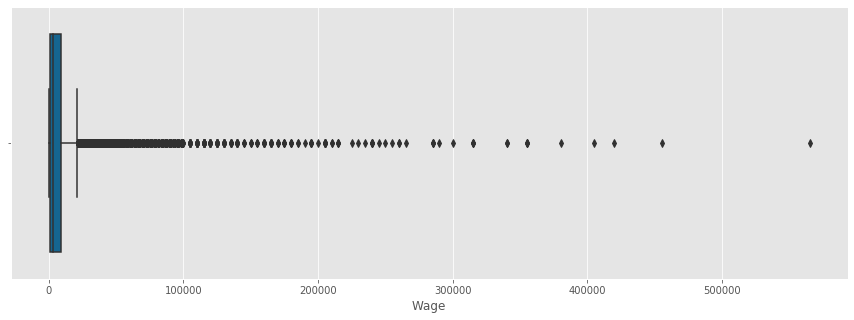

In [77]:
import seaborn as sns
sns.boxplot(x=new_data["Wage"])

### it was expected that there is alot of outliers because it is a continuous data, lets see Value's column

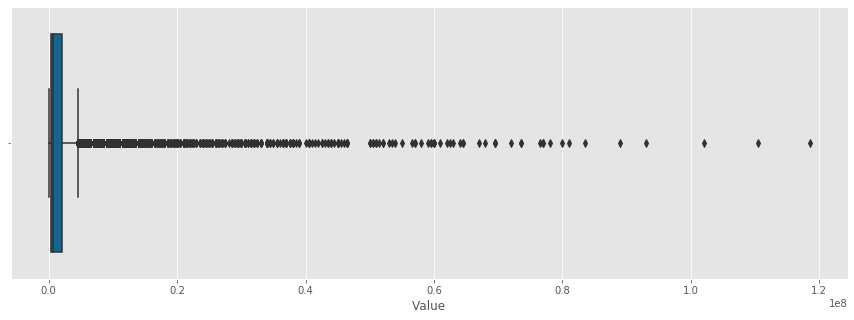

In [78]:
import seaborn as sns
sns.boxplot(x=new_data["Value"])

### let's see also Skill Moves column's boxplot as it is not clarefied enough in the above plot

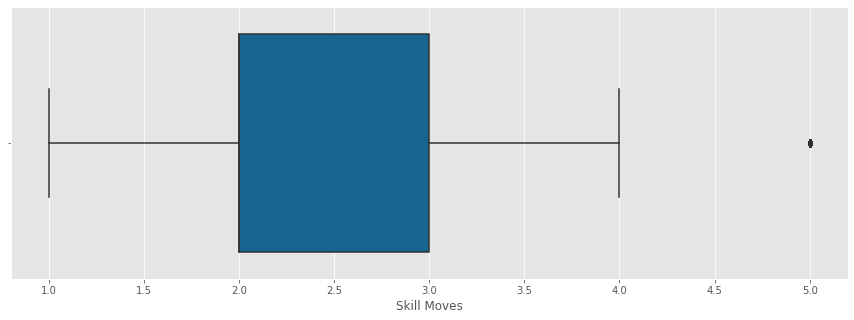

In [79]:
import seaborn as sns
sns.boxplot(x=new_data["Skill Moves"])

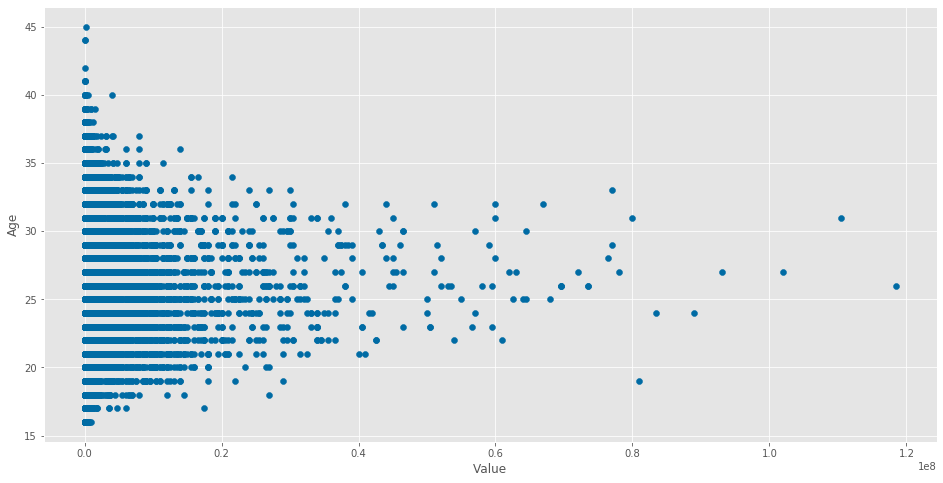

In [80]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(new_data["Value"],new_data["Age"])
ax.set_xlabel('Value')
ax.set_ylabel('Age')
plt.show()

### let's see the biggest 3 outliers shown here

In [81]:
new_data.sort_values(by= ["Value"], ascending = False).head(3)


,Name,Nationality,Club,Age,Overall,Position,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Finishing,FKAccuracy,SprintSpeed,general position
2,Neymar Jr,Brazil,Paris Saint-Germain,26,92,LW,Right,118500000.0,290000.0,High/ Medium,5.0,5.0,87.0,87.0,90.0,ATK
0,L. Messi,Argentina,FC Barcelona,31,94,RF,Left,110500000.0,565000.0,Medium/ Medium,5.0,4.0,95.0,94.0,86.0,ATK
4,K. De Bruyne,Belgium,Manchester City,27,91,RCM,Right,102000000.0,355000.0,High/ High,4.0,4.0,82.0,83.0,76.0,MID
